In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

df = pd.read_csv("train.csv")
df.isna().sum()

id                  0
N_Days              0
Drug             6550
Age                 0
Sex                 0
Ascites          6547
Hepatomegaly     6552
Spiders          6559
Edema               0
Bilirubin           0
Cholesterol      8374
Albumin             0
Copper           6660
Alk_Phos         6556
SGOT             6559
Tryglicerides    8425
Platelets         584
Prothrombin        16
Stage               0
Status              0
dtype: int64

In [21]:
# Step 1: Define a function to fill missing values with mode per group
def fillna_with_mode_per_group(df, group_col):
    for column in df.columns:
        if column != group_col:  # Skip the grouping column
            # Fill missing values in the column based on the mode within each group
            df[column] = df.groupby(group_col)[column].transform(
                lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
            )
    return df

# Step 2: Apply the function to replace nulls in the DataFrame
cleaned_null_df = df.copy()  # Work with a copy to avoid modifying the original DataFrame
cleaned_null_df = fillna_with_mode_per_group(cleaned_null_df, group_col='Status')

print(cleaned_null_df)
# Check for remaining nulls
print(cleaned_null_df.isna().sum())


          id  N_Days             Drug      Age Sex Ascites Hepatomegaly  \
0          0  1170.0  D-penicillamine  23741.0   F       Y            Y   
1          1  1786.0          Placebo  25329.0   F       N            Y   
2          2  1067.0  D-penicillamine  15706.0   F       N            N   
3          3  4062.0  D-penicillamine  23011.0   F       N            N   
4          4  1067.0          Placebo  11773.0   F       N            Y   
...      ...     ...              ...      ...  ..     ...          ...   
14995  14995  3468.0  D-penicillamine  12419.0   F       N            Y   
14996  14996  1525.0  D-penicillamine  14025.0   F       N            N   
14997  14997  1084.0          Placebo  16839.0   M       N            Y   
14998  14998  1000.0  D-penicillamine  24621.0   F       N            Y   
14999  14999  3458.0          Placebo  20600.0   F       N            N   

      Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0           N     Y      

In [22]:
# Calculate the z-score for each columns
z_ndays = np.abs(stats.zscore(cleaned_null_df['N_Days']))
# z_drug = np.abs(stats.zscore(cleaned_null_df['Drug']))
z_age = np.abs(stats.zscore(cleaned_null_df['Age']))
# z_sex = np.abs(stats.zscore(cleaned_null_df['Sex']))
# z_ascites = np.abs(stats.zscore(cleaned_null_df['Ascites']))
# z_hepatomegaly = np.abs(stats.zscore(cleaned_null_df['Hepatomegaly']))
# z_spiders = np.abs(stats.zscore(cleaned_null_df['Spiders']))
# z_edema = np.abs(stats.zscore(cleaned_null_df['Edema']))
z_bilirubin = np.abs(stats.zscore(cleaned_null_df['Bilirubin']))
z_cholesterol = np.abs(stats.zscore(cleaned_null_df['Cholesterol']))
z_albumin = np.abs(stats.zscore(cleaned_null_df['Albumin']))
z_copper = np.abs(stats.zscore(cleaned_null_df['Copper']))
z_alk_phos = np.abs(stats.zscore(cleaned_null_df['Alk_Phos']))
z_SGOT = np.abs(stats.zscore(cleaned_null_df['SGOT']))
z_tryglicerides = np.abs(stats.zscore(cleaned_null_df['Tryglicerides']))
z_platelets = np.abs(stats.zscore(cleaned_null_df['Platelets']))
z_prothrombin = np.abs(stats.zscore(cleaned_null_df['Prothrombin']))
z_stage = np.abs(stats.zscore(cleaned_null_df['Stage']))

# Define the threshold for outliers
threshold = 3

# Create a mask for rows where all z-scores are below the threshold
mask = (
    (z_ndays <= threshold) &
    (z_age <= threshold) &
    (z_bilirubin <= threshold) &
    (z_cholesterol <= threshold) &
    (z_albumin <= threshold) &
    (z_copper <= threshold) &
    (z_alk_phos <= threshold) &
    (z_SGOT <= threshold) &
    (z_tryglicerides <= threshold) &
    (z_platelets <= threshold) &
    (z_prothrombin <= threshold) &
    (z_stage <= threshold)
)

# Filter the dataset using the mask
filtered_df = cleaned_null_df[mask]

# Display the result
print(f"Original dataset size: {cleaned_null_df.shape}")
print(f"Filtered dataset size: {filtered_df.shape}")

Original dataset size: (15000, 20)
Filtered dataset size: (13389, 20)


In [23]:
print(filtered_df)

          id  N_Days             Drug      Age Sex Ascites Hepatomegaly  \
0          0  1170.0  D-penicillamine  23741.0   F       Y            Y   
1          1  1786.0          Placebo  25329.0   F       N            Y   
2          2  1067.0  D-penicillamine  15706.0   F       N            N   
3          3  4062.0  D-penicillamine  23011.0   F       N            N   
4          4  1067.0          Placebo  11773.0   F       N            Y   
...      ...     ...              ...      ...  ..     ...          ...   
14994  14994  1368.0  D-penicillamine  15706.0   F       N            N   
14995  14995  3468.0  D-penicillamine  12419.0   F       N            Y   
14996  14996  1525.0  D-penicillamine  14025.0   F       N            N   
14998  14998  1000.0  D-penicillamine  24621.0   F       N            Y   
14999  14999  3458.0          Placebo  20600.0   F       N            N   

      Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0           N     Y      

                 N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
N_Days         1.000000 -0.063429  -0.208830    -0.032078  0.180506 -0.171785   
Age           -0.063429  1.000000   0.030105    -0.078759 -0.126212  0.034371   
Bilirubin     -0.208830  0.030105   1.000000     0.226301 -0.244092  0.398666   
Cholesterol   -0.032078 -0.078759   0.226301     1.000000  0.008622  0.194431   
Albumin        0.180506 -0.126212  -0.244092     0.008622  1.000000 -0.160811   
Copper        -0.171785  0.034371   0.398666     0.194431 -0.160811  1.000000   
Alk_Phos      -0.133234  0.139703   0.216949     0.023392 -0.160151  0.296343   
SGOT          -0.056770 -0.015653   0.176226     0.135126 -0.063754  0.210137   
Tryglicerides -0.051304 -0.049641   0.232773     0.315107 -0.013276  0.277845   
Platelets      0.137908 -0.122572  -0.070254     0.092203  0.160690 -0.069077   
Prothrombin   -0.142637  0.143533   0.319381    -0.009434 -0.221515  0.302411   
Stage         -0.176887  0.1

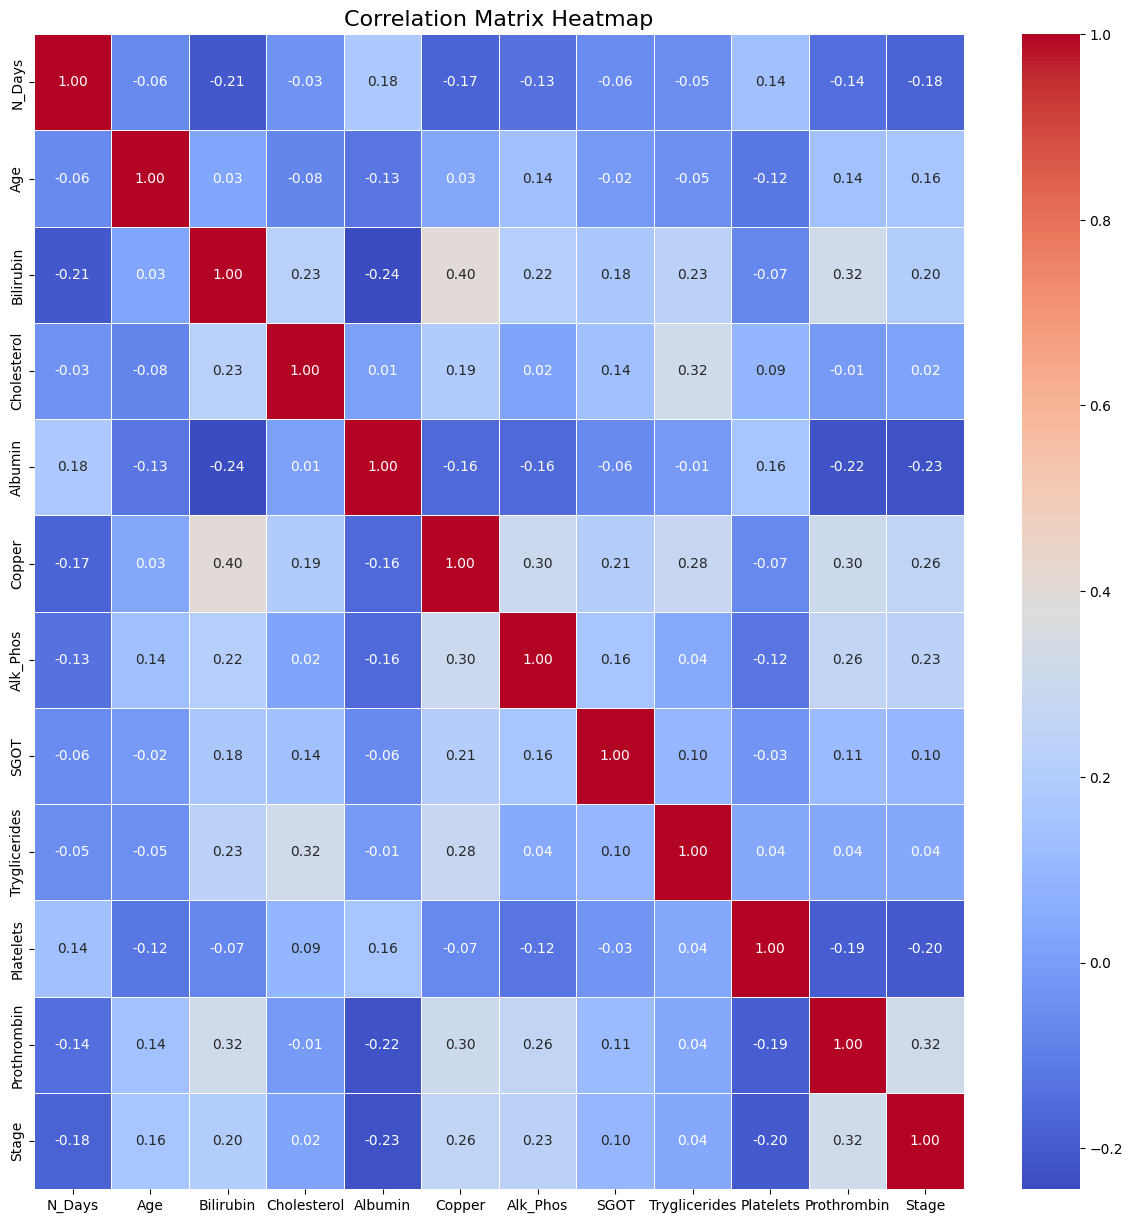

In [24]:
columns_to_exclude = ['Status', 'id']
df_for_corr = cleaned_null_df.drop(columns=columns_to_exclude)

numeric_columns = df_for_corr.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

print(correlation_matrix)

plt.figure(figsize=(15, 15)) 
sns.heatmap(
    correlation_matrix,
    annot=True,            
    cmap='coolwarm',       
    fmt='.2f',              
    linewidths=0.5,         
    annot_kws={"size": 10} 
)
plt.title('Correlation Matrix Heatmap', fontsize=16)  
plt.show()


In [25]:
# Step 1: Encode categorical columns and prepare the dataset
columns_to_encode = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
encoder = LabelEncoder()
for column in columns_to_encode:
    cleaned_null_df.loc[:, column] = encoder.fit_transform(cleaned_null_df[column]).astype('int32')

# Exclude irrelevant columns
columns_to_exclude = ['id']
df_for_model = cleaned_null_df.drop(columns=columns_to_exclude)

In [26]:
# Step 2: Split data into features (X) and target (y)
X = df_for_model.drop(columns=['Status'])  # Features
y = df_for_model['Status']  # Target variable

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Use 3 neighbors as an example
knn.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8606666666666667

Classification Report:
              precision    recall  f1-score   support

           C       0.87      0.94      0.91      2031
          CL       0.54      0.30      0.39        63
           D       0.84      0.72      0.78       906

    accuracy                           0.86      3000
   macro avg       0.75      0.65      0.69      3000
weighted avg       0.86      0.86      0.86      3000



In [27]:
gnb = GaussianNB()

# Step 4: Train the GNB classifier & Make predictions
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.853

Classification Report:
              precision    recall  f1-score   support

           C       0.92      0.91      0.92      2031
          CL       0.12      0.37      0.18        63
           D       0.86      0.75      0.80       906

    accuracy                           0.85      3000
   macro avg       0.63      0.68      0.63      3000
weighted avg       0.88      0.85      0.87      3000



In [28]:
clf = tree.DecisionTreeClassifier()

y_pred = clf.fit(X_train, y_train).predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8906666666666667

Classification Report:
              precision    recall  f1-score   support

           C       0.93      0.92      0.93      2031
          CL       0.52      0.59      0.55        63
           D       0.84      0.84      0.84       906

    accuracy                           0.89      3000
   macro avg       0.76      0.78      0.77      3000
weighted avg       0.89      0.89      0.89      3000

